In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [247]:
#create a dataframe and read the csv
df = pd.read_csv('C:/Users/Ankit Hiremath/Downloads/archive (1)/train_u6lujuX_CVtuZ9i.csv')

In [248]:
#look at the data
df.shape

(614, 13)

In [249]:
df.head()
#there is categorical data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [250]:
#check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [251]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [252]:
#we have to change credit_history to object as its values are either 0 or 1
df['Credit_History'] = df['Credit_History'].astype('O')

In [253]:
df.describe(include='O')
#describe with objects

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002219,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [254]:
#we will drop Loan_id as it is not imp
df.drop('Loan_ID' , axis=1 , inplace=True)

In [255]:
#check for duplicates
df.duplicated().any()

False

x= 0.312704 
y= 0.687296


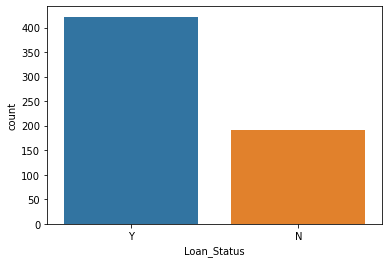

In [256]:
# let us check the status of Y n NO
plt.figure()
sns.countplot(df['Loan_Status'])




print('x= %f '% (df['Loan_Status'].value_counts()[1]/len(df)))


print('y= %f' % (df['Loan_Status'].value_counts()[0] / len(df)))

#percentage 

In [257]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

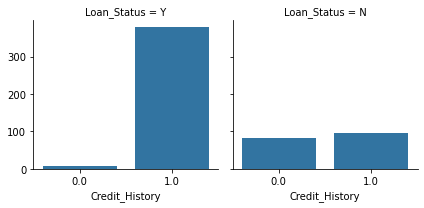

In [258]:
grid = sns.FacetGrid(df,col='Loan_Status')
grid.map(sns.countplot, 'Credit_History');
#checking if u would get a loan on ur credit_history

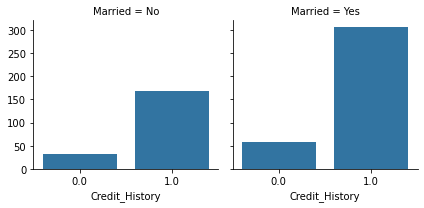

In [259]:
grid = sns.FacetGrid(df,col='Married')
grid.map(sns.countplot, 'Credit_History')

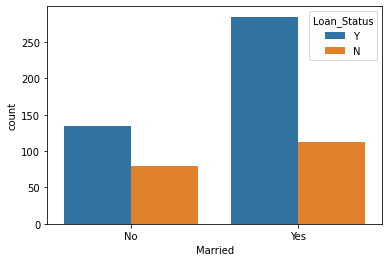

In [260]:
# Married
plt.figure()
sns.countplot(x='Married', hue='Loan_Status', data=df);

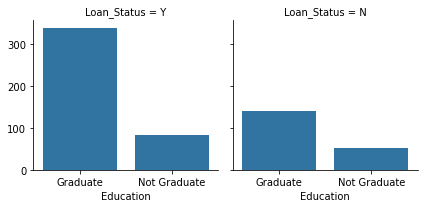

In [261]:
#education
# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

grid = sns.FacetGrid(df,col='Loan_Status')
grid.map(sns.countplot, 'Education');

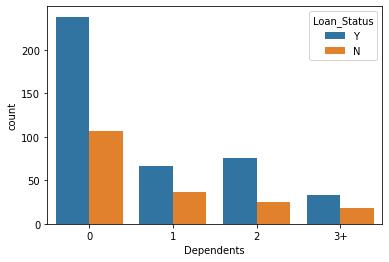

In [262]:
#dependents acts as an imp feature as lesser the dependents more chances of getting a loan
plt.figure()
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

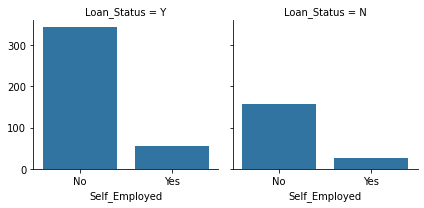

In [263]:
#self_emp also same as Education
grid = sns.FacetGrid(df,col='Loan_Status')

grid.map(sns.countplot, 'Self_Employed');

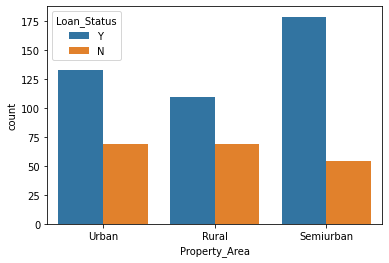

In [264]:
plt.figure()
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);
#chances are more in sub-urban area good feature

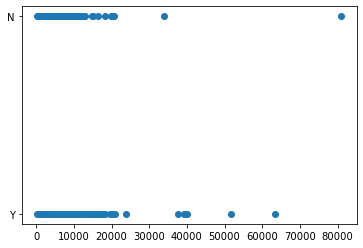

In [265]:
plt.scatter(df['ApplicantIncome'], df['Loan_Status']);
#ApplicantIncome no pattern

In [266]:
df.groupby('Loan_Status').median() # median because Not affected with outliers
#coappliant Income is a good feature as if differed with loan_status

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [267]:
#missing values 
df.isnull().sum().sort_values(ascending= False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [268]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])
        

In [269]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [270]:
cat_data.head()#categorical data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [271]:
num_data.head() #numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [272]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [273]:
# num_data
# fill every missing value with their previous value in the same column

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data 

False

In [274]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [275]:
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [276]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [277]:
# transform other columns

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [278]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [279]:
df = pd.concat([cat_data,num_data,target] , axis=1)

In [280]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


Train the data

In [281]:
X = pd.concat([cat_data,num_data] , axis = 1)
Y = target

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.69653768 0.30346232]
ratio of target in y_test : [0.6504065 0.3495935]
ratio of target in original_data : [0.68729642 0.31270358]


In [283]:
# we will use 4 different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

Build functions

In [284]:
#for calculating loss
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true , y_pred, retu=False) :
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))
    

In [285]:
# for training train_eval_train

def train_eval_train(models , X ,y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)





LogisticRegression :
  pre: 0.904
  rec: 0.443
  f1: 0.595
  loss: 6.331
  acc: 0.817
------------------------------
KNeighborsClassifier :
  pre: 0.614
  rec: 0.342
  f1: 0.440
  loss: 9.145
  acc: 0.735
------------------------------
SVC :
  pre: 1.000
  rec: 0.020
  f1: 0.039
  loss: 10.270
  acc: 0.703
------------------------------
DecisionTreeClassifier :
  pre: 0.914
  rec: 0.430
  f1: 0.584
  loss: 6.401
  acc: 0.815
------------------------------


In [286]:
#evaluating on different data
#train_eval_cross
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

# ohhh, as i said SVC is just memorizing the data, and you can see that here DecisionTreeClassifier is better than LogisticRegression

LogisticRegression :
 pre     0.900556
 rec     0.436190
 f1      0.574920
 loss    6.608905
 acc     0.808653
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.360685
 rec      0.188095
 f1       0.241444
 loss    11.819387
 acc      0.657796
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.622439
 acc      0.692449
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.931389
 rec     0.429048
 f1      0.577162
 loss    6.397437
 acc     0.814776
Name: 0, dtype: float64
------------------------------


Improve the model

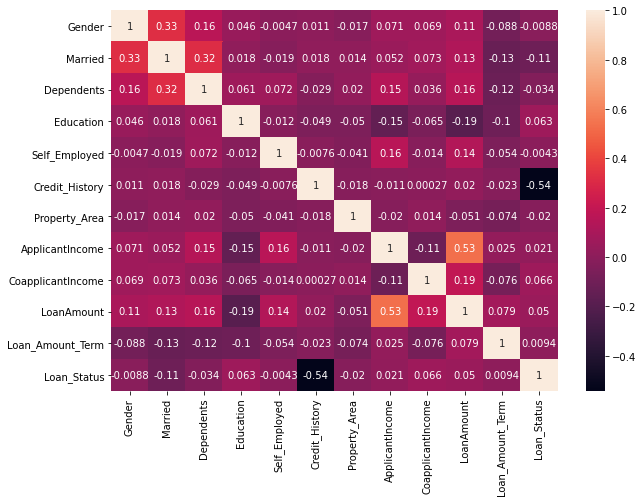

In [287]:
# ooh, we got it right for most of the features, as you can see we've say at the first of the kernel ,
# that Credit_Histroy and Married etc, are good features, actually Credit_Histroy is the best .

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# here we got 58% similarity between LoanAmount & ApplicantIncome 
# and that may be bad for our model so we will see what we can do

In [288]:
X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
83,1,1,0,0,0,1,1,6000.0,2250.0,265.0,360.0
90,1,1,0,0,0,1,1,2958.0,2900.0,131.0,360.0
227,1,1,2,0,0,1,1,6250.0,1695.0,210.0,360.0
482,1,1,0,0,0,1,1,2083.0,3150.0,128.0,360.0
464,1,0,0,0,0,0,1,4166.0,0.0,98.0,360.0


In [289]:
#rent operations on diffrent features,
# having experience in the field, and having knowledge about the data will also help

X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

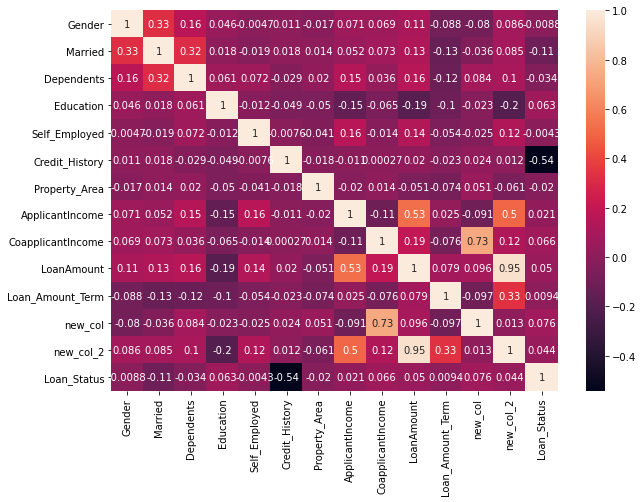

In [290]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [291]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [292]:
train_eval_cross(models, X_train, y_train, skf)
# ok, SVC is improving, but LogisticRegression is overfitting
# i wan't change nothing so we can see what will happen as we go

LogisticRegression :
 pre      0.050000
 rec      0.006667
 f1       0.011765
 loss    10.481463
 acc      0.696531
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.250278
 rec      0.147143
 f1       0.184957
 loss    13.577371
 acc      0.606898
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.481461
 acc      0.696531
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.931389
 rec     0.429048
 f1      0.577162
 loss    6.397437
 acc     0.814776
Name: 0, dtype: float64
------------------------------


In [293]:
# first lets take a look at the value counts of every label

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    312
0    179
Name: Married, dtype: int64
------------------------------------------------
0    293
1     79
2     78
3     41
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    424
1     67
Name: Self_Employed, dtype: int64
------------------------------------------------
1    421
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    191
2    159
0    141
Name: Property_Area, dtype: int64
------------------------------------------------
0.000000    221
0.735294      2
0.330420      1
0.971978      1
0.631436      1
           ... 
0.575006      1
0.966751      1
0.926528      1
0.952096      1
0.375000      1
Name: new_col, Length: 270, dtype: int64
------------------------------------------------
36000.0     13
4320

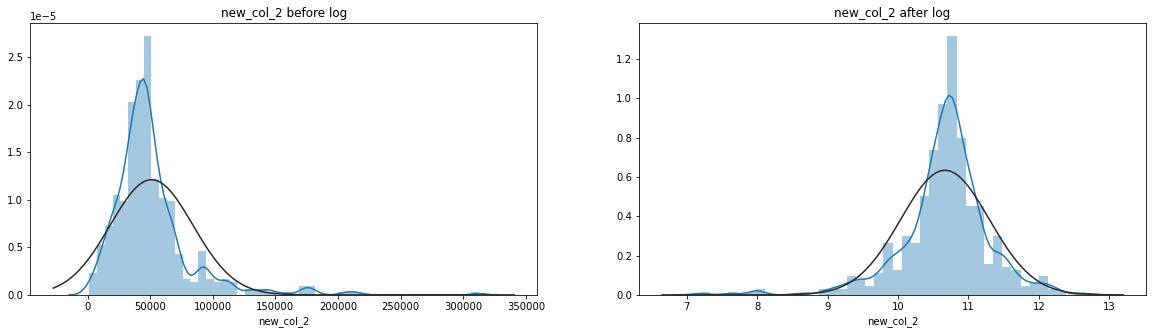

In [294]:
# new_col_2

# we can see we got right_skewed
# we can solve this problem with very simple statistical teqniq , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');






In [295]:
# now we will evaluate our models, and i will do that continuously ,so i don't need to mention that every time

train_eval_cross(models, X_train, y_train, skf)

#  our models improved really good by just doing the previous step

LogisticRegression :
 pre     0.931389
 rec     0.436190
 f1      0.584531
 loss    6.326950
 acc     0.816816
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.671667
 rec     0.260952
 f1      0.364423
 loss    9.353702
 acc     0.729184
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.150000
 rec      0.042381
 f1       0.064396
 loss    10.129026
 acc      0.706735
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.931389
 rec     0.429048
 f1      0.577162
 loss    6.397437
 acc     0.814776
Name: 0, dtype: float64
------------------------------


In [296]:
# new_col

# most of our data is 0 , so we will try to change other values to 1

print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000    221
0.735294      2
0.330420      1
0.971978      1
0.631436      1
           ... 
0.575006      1
0.966751      1
0.926528      1
0.952096      1
0.375000      1
Name: new_col, Length: 270, dtype: int64
--------------------------------------------------

after:
1.0    270
0.0    221
Name: new_col, dtype: int64


In [297]:
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
 pre     0.931389
 rec     0.429048
 f1      0.577162
 loss    6.397437
 acc     0.814776
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.573532
 rec     0.266667
 f1      0.355331
 loss    9.283215
 acc     0.731224
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.942500
 rec     0.369048
 f1      0.514091
 loss    6.961334
 acc     0.798449
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.931389
 rec     0.429048
 f1      0.577162
 loss    6.397437
 acc     0.814776
Name: 0, dtype: float64
------------------------------


In [298]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')
    
# looks better

1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    312
0    179
Name: Married, dtype: int64
------------------------------------------------
0    293
1     79
2     78
3     41
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    424
1     67
Name: Self_Employed, dtype: int64
------------------------------------------------
1    421
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    191
2    159
0    141
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    270
0.0    221
Name: new_col, dtype: int64
------------------------------------------------
10.491274    13
10.673596    13
10.961278    12
10.586584    11
10.738134    10
             ..
9.736252      1
11.542096     1
11.616204     1
11.067888     1
8.626944      1
Name: new_

Outliers

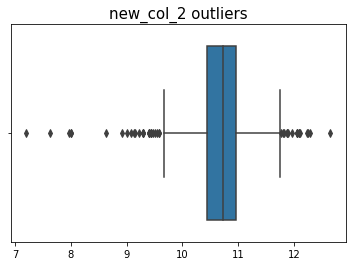

In [299]:
# we will use boxplot to detect outliers

sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [300]:
threshold = 0.1  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .
                 # that's why I was surprised when 0.1 gived me the best result
            
new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.439980923050696 , Quartile 75: 10.961277846683982
iqr: 0.5212969236332867
Cut Off: 0.05212969236332868
Lower: 10.387851230687367
Upper: 11.01340753904731
Nubers of Outliers: 223
outliers:[11.465833857436378, 11.233211562167625, 12.231740392278752, 11.117212648304742, 11.404894720756523, 10.35201215010474, 11.090110718526951, 11.877568578558138, 11.741175953652583, 10.280553186122594, 11.05089000537367, 9.392661928770137, 10.304944639246754, 11.079060882340366, 9.469622969906265, 10.280553186122594, 8.922658299524402, 11.233211562167625, 11.62589694362939, 10.328755287940472, 12.090661794018846, 11.228438283414967, 11.05089000537367, 9.996977895623466, 11.084601062715981, 11.06788758174224, 11.542095842270008, 10.38591370178042, 9.670293665368417, 11.261382439134321, 11.021902468500418, 9.084777149000837, 9.798127036878302, 9.920344669602551, 10.31692083029347, 11.502875129116727, 12.100712129872347, 11.362567583381667, 10.298902324790792, 10.134599273499514, 11.19106594

In [301]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

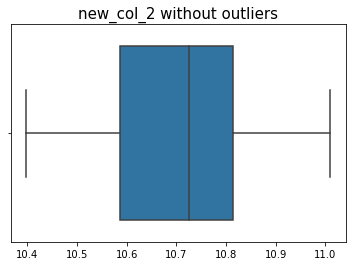

In [302]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

#removal of outliers

In [303]:
train_eval_cross(models, X_train, y_train, skf)

# know we got 94.1 for precision & 53.5 for recall

LogisticRegression :
 pre     0.903810
 rec     0.526190
 f1      0.625415
 loss    4.885628
 acc     0.858547
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.723333
 rec     0.319048
 f1      0.429040
 loss    7.355510
 acc     0.787037
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.000000
 rec     0.000000
 f1      0.000000
 loss    8.890537
 acc     0.742593
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.903810
 rec     0.526190
 f1      0.625415
 loss    4.885628
 acc     0.858547
Name: 0, dtype: float64
------------------------------


feature selection

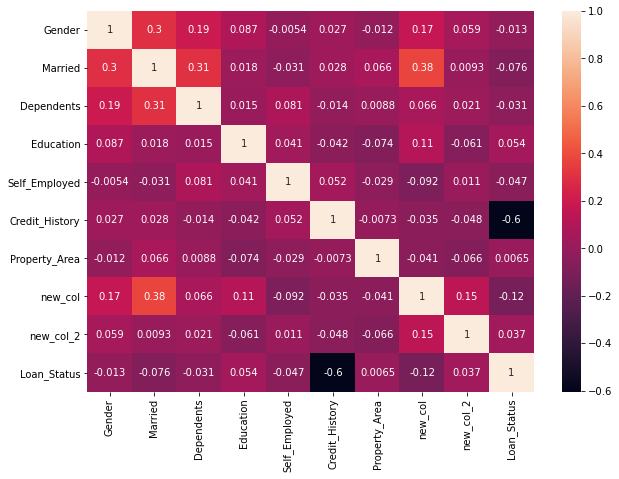

In [304]:
# Self_Employed got really bad corr (-0.00061) , let's try remove it and see what will happen

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [305]:
X_train.drop(['Self_Employed'], axis=1, inplace=True)

train_eval_cross(models, X_train, y_train, skf)

# looks like Self_Employed is not important
# KNeighborsClassifier improved

# droping all the features Except for Credit_History actually improved KNeighborsClassifier and didn't change anything in other models
# so you can try it by you self
# but don't forget to do that on testing data too

#X_train.drop(['Self_Employed','Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)


LogisticRegression :
 pre     0.903810
 rec     0.526190
 f1      0.625415
 loss    4.885628
 acc     0.858547
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.708333
 rec     0.290476
 f1      0.398333
 loss    7.478508
 acc     0.783476
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.000000
 rec     0.000000
 f1      0.000000
 loss    8.890537
 acc     0.742593
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.903810
 rec     0.526190
 f1      0.625415
 loss    4.885628
 acc     0.858547
Name: 0, dtype: float64
------------------------------


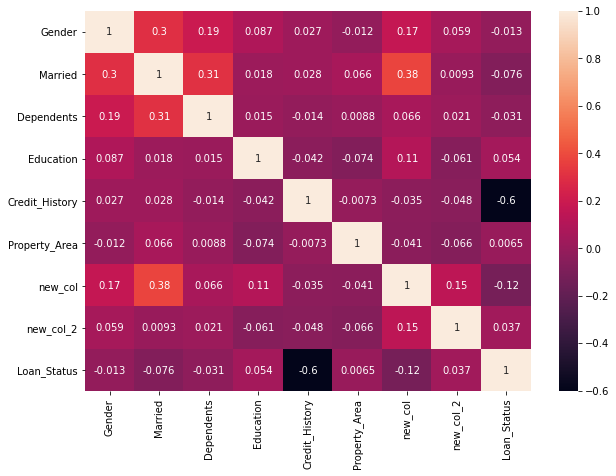

In [306]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

evaluate the models on Test_data
here we will just repeat what we did in training data

In [307]:
X_test.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
350,1,1,0,0,0,1,1,9083.0,0.0,228.0,360.0
377,1,1,0,0,0,1,1,4310.0,0.0,130.0,360.0
163,1,1,2,0,0,1,0,4167.0,1447.0,158.0,360.0
609,0,0,0,0,0,1,0,2900.0,0.0,71.0,360.0
132,1,0,0,0,0,1,1,2718.0,0.0,70.0,360.0


In [308]:
X_test_new = X_test.copy()

In [309]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount','Self_Employed'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

In [310]:
X_test_new.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,new_col,new_col_2
350,1,1,0,0,1,1,0.0,11.315450
377,1,1,0,0,1,1,0.0,10.753638
163,1,1,2,0,1,0,1.0,10.948699
609,0,0,0,0,1,0,0.0,10.148784
132,1,0,0,0,1,1,0.0,10.134599


In [311]:
X_train.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,new_col,new_col_2
90,1,1,0,0,1,1,1.0,10.761301
482,1,1,0,0,1,1,1.0,10.738134
464,1,0,0,0,0,1,0.0,10.471072
79,1,1,3,1,1,1,1.0,10.753638
23,1,1,2,1,0,0,1.0,10.604603


In [312]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

LogisticRegression:
  pre: 0.947
  rec: 0.419
  f1: 0.581
  loss: 7.301
  acc: 0.789
----------------------------------------
KNeighborsClassifier:
  pre: 0.875
  rec: 0.326
  f1: 0.475
  loss: 8.705
  acc: 0.748
----------------------------------------
SVC:
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 12.075
  acc: 0.650
----------------------------------------
DecisionTreeClassifier:
  pre: 0.947
  rec: 0.419
  f1: 0.581
  loss: 7.301
  acc: 0.789
----------------------------------------


# Conclusion:

what ever we do, our recall score will not improving , maybe because we don't have a good amount of data, so I think if we got more data and we try more complex models our accuracy will improve